# Lab | Cleaning numerical data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math

In [4]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()


(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
display(customer_df.shape)


(9134, 24)

In [14]:
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [ ]:
# Our target column is total_claim_amount

### 1- Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [8]:
columns = []
for col in customer_df.columns: 
    if ' ' in col:
        col = col.replace(' ','_')
        columns.append(col.lower())
    else:
        columns.append(col.lower())
        
customer_df.columns = columns

In [10]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 2. Change effective to date column to datetime format.

In [29]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

customer_df['months_since_last_claim'] = customer_df['months_since_last_claim'].astype(str)
customer_df['months_since_policy_inception'] = customer_df['months_since_policy_inception'].astype(str)

### 3. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [22]:
numerical_df = customer_df.select_dtypes(include=[np.number])
categorical_df = customer_df.select_dtypes(include=[object])
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### 4. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [31]:
def cont_disc(x):
    y = pd.DataFrame()
    z = pd.DataFrame()
    for i in x:
        if len(pd.unique(x[i].values.ravel('K'))) > 9:
            y[i] = x[i]
        else:
            z[i] = x[i]
    return y,z

In [33]:
continuous_df,discrete_df = cont_disc(numerical_df)

### 5. Plot a correlation matrix, comment what you see.

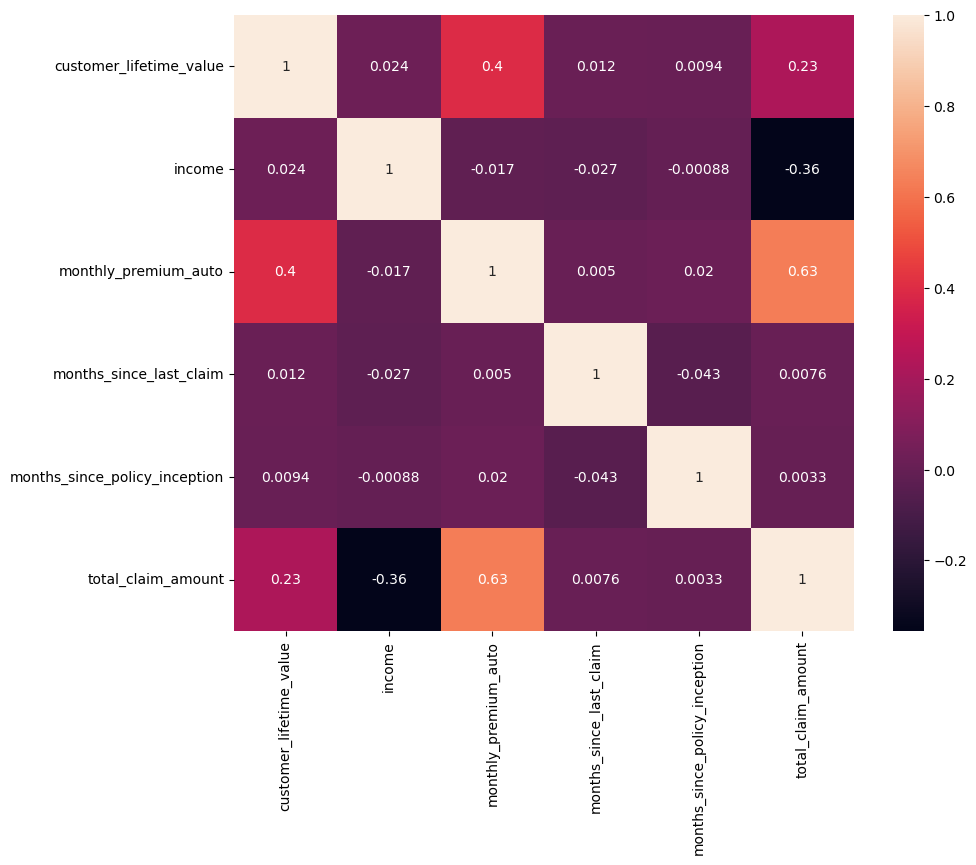

In [36]:
corr_matrix=continuous_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### 6. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [37]:
def hist_plot(x):
    for i in x.columns:
        plt.title(i, fontsize=16)
        plt.figure()
        plt.hist(x[i])

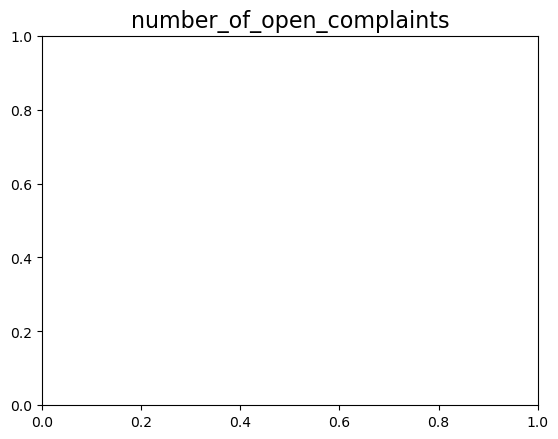

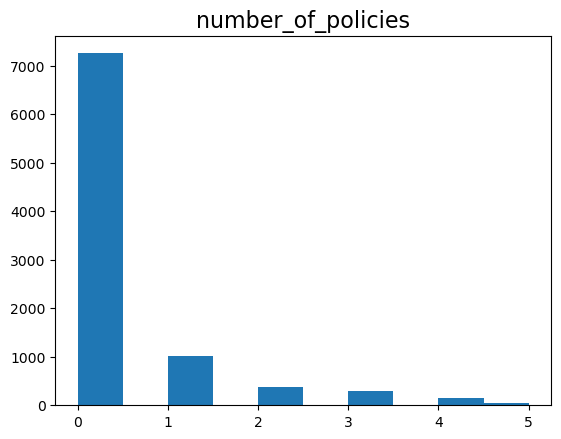

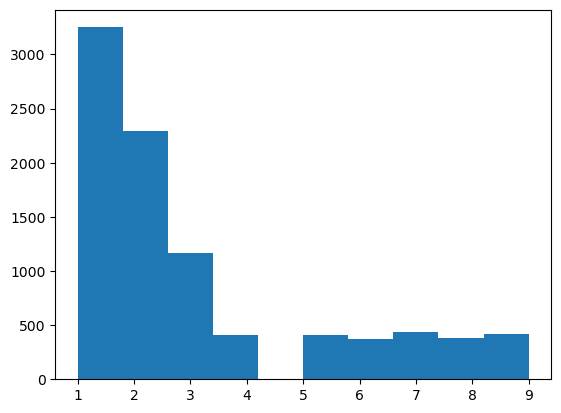

In [38]:
hist_plot(discrete_df)

### 7. Comment what you can see in the plots.

In [ ]:
#The graphs show us that there is a significant imbalance between type of car, size and policy.
#The sales channel for its part is quite well balanced with agents and branches being the most effective channels to create sales.

### 8. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [41]:
def cont_plot(x):
    for i in x.columns:
        if 'effective_to_date' != i:
            sns.boxplot(y=x[i])
            plt.title(i, fontsize=16)
            plt.show()

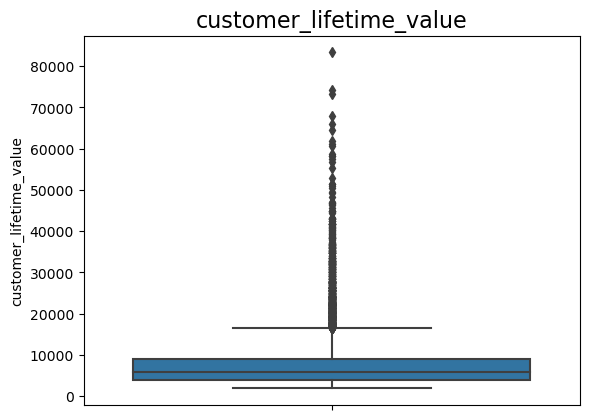

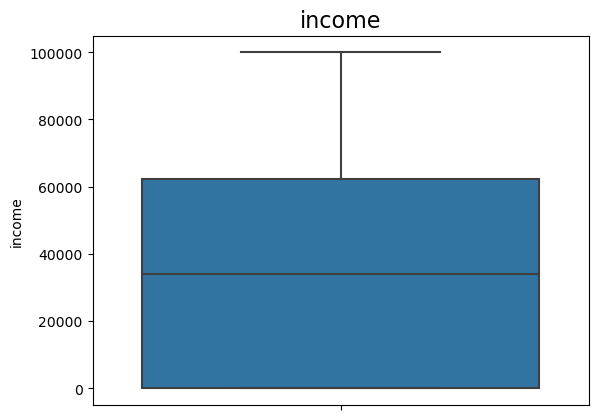

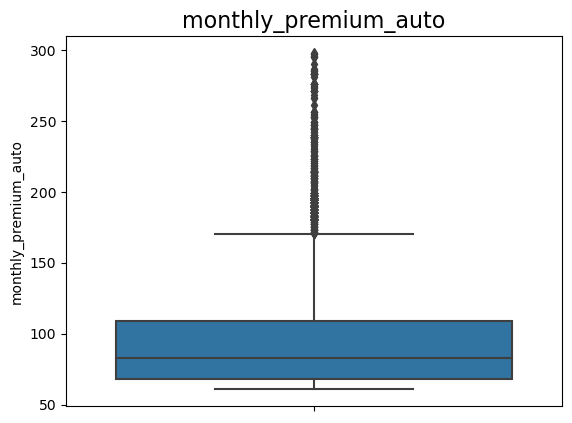

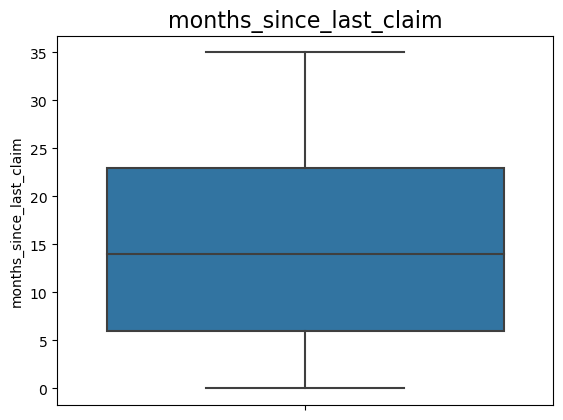

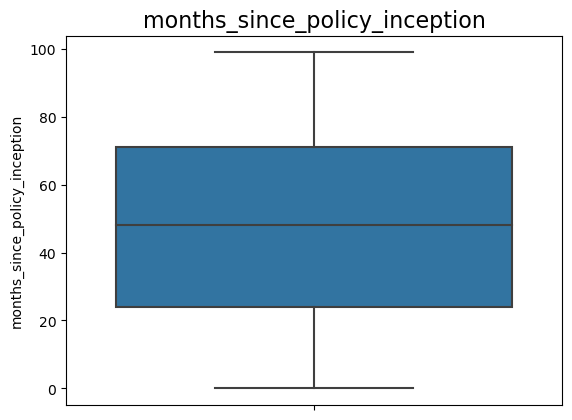

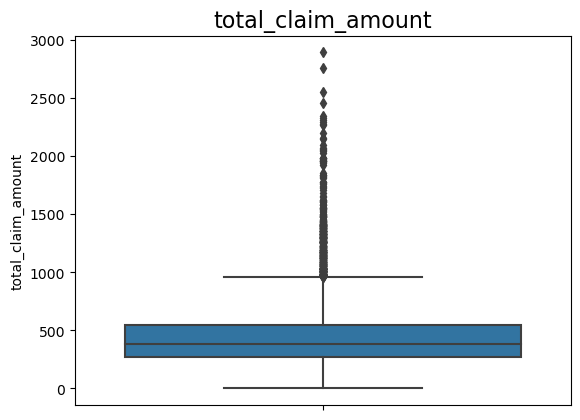

In [42]:
cont_plot(continuous_df)

### 9. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [ ]:
#Yes, there are outliers, especially with customer_lifetime_value, monthly_premium_auto and total_claim_amount. We could do something with the customer lifetime value column as dropping the rows, as the outliers are very much outside, comparing with the other two. 
#But as it is a quite large quantity, we will not remove them for tnow. 


### 10. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [43]:
customer_df.isna().sum()
#No Nan values. Good!

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
month                            0
day_week                         0
dtype: int64

### 11. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [44]:
numerical_df.to_csv('numerical.csv')

# Lab | Cleaning categorical data

### 1.Find all of the categorical data. Save it in a categorical_df variable.

In [ ]:
categorical_df

### 2.Check for NaN values and decide what to do with them, do it now.

In [46]:
categorical_df.isna().sum()
#No Nan values. Good!

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

### 3.Check all unique values of columns

In [48]:
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

### 4. Check dtypes. Do they all make sense as categorical data?

In [49]:
categorical_df.dtypes

#yes, they all make sense being separated into categories

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

### 5. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [55]:
categorical_df 
#Yes, there are three columns with alpha and numeric data: customer, policy and renew_offer_type

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [90]:
# We will drop the 'costumer' column bacause they are single/unique values that will not contribute anything to our research. 

categorical_df = categorical_df.drop(['customer'], axis=1)

In [91]:
categorical_df['policy'].value_counts()

#We will not make any changes to the 'policy' column for now.

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [92]:
# And the same with the 'renew_offer_type' column, we are not going to make any changes for now.

categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

### 6. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [86]:
#Not really, the data is relatively clean, there are no NaN values and we don't see other values that may be of concern.


### 7. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [93]:
categorical_df.groupby(["policy_type",'policy'])['gender'].count()
#We can drop the policy_type column, as the type is already included in policy column.

policy_type     policy      
Corporate Auto  Corporate L1     359
                Corporate L2     595
                Corporate L3    1014
Personal Auto   Personal L1     1240
                Personal L2     2122
                Personal L3     3426
Special Auto    Special L1        66
                Special L2       164
                Special L3       148
Name: gender, dtype: int64

### 8. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [94]:
categorical_df.nunique()
#Perhaps the 'policy' column could be combined by leaving it with only three values: Personal, Corporate and Special. But by doing this, we may be missing important information. It depends on the meaning of L3/L2/L1.

state               5
response            2
coverage            3
education           5
employmentstatus    5
gender              2
location_code       3
marital_status      3
policy_type         3
policy              9
renew_offer_type    4
sales_channel       4
vehicle_class       6
vehicle_size        3
dtype: int64

### 9. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week

In [95]:
categorical_df.to_csv('categorical.csv')